## Machine Learning - Ex.2


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

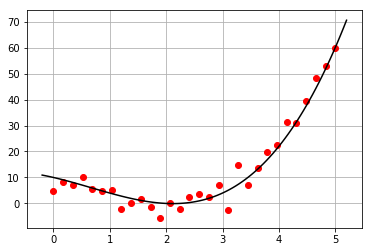

In [2]:
# generate the training data:

N = 30

# generate N sample points 
x = np.linspace(0,5,N) 
y = x**3 -2*x**2 -5*x + 10
y += np.random.randn(N)*4 # add gaussian noise (with sigma = 4)


# generate 100 points to visualize the true polynomial 
xx = np.linspace(-0.2,5.2,100) 
yy = xx**3 -2*xx**2 -5*xx + 10


plt.plot(x,y,'or',xx,yy,'-k')
plt.grid()
plt.show()

### Design Matrix

In this exercise we will fit to the data a polynomial model of degree $d$,

$$ f(x;w) = w_0 + w_1 x + w_2 x^2 + ... + w_d x^d $$

As a first step, write a function that generates a $N\times(d+1)$ design-matrix from the data $\{x_i\}_{i=1}^N$, where the $j$-th coloumn ($j=0,1,...,d)$ contains the values of $(x_i)^j$.

tip: you can use numpy's *broadcasting* technique to perform that without any loops: 

- http://www.labri.fr/perso/nrougier/from-python-to-numpy/index.html#broadcasting

In [3]:
### Generate the design-matrix ....

def design_matrix(x, d,N):
    # your code here...
    Z1 = x.reshape(N,1)
    Z2 = np.arange(d+1).reshape(1,d+1)
    return Z1**Z2

# test your code here:
des_m = design_matrix(x,3,N)
print(des_m)


[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   1.72413793e-01   2.97265161e-02   5.12526139e-03]
 [  1.00000000e+00   3.44827586e-01   1.18906064e-01   4.10020911e-02]
 [  1.00000000e+00   5.17241379e-01   2.67538644e-01   1.38382057e-01]
 [  1.00000000e+00   6.89655172e-01   4.75624257e-01   3.28016729e-01]
 [  1.00000000e+00   8.62068966e-01   7.43162901e-01   6.40657674e-01]
 [  1.00000000e+00   1.03448276e+00   1.07015458e+00   1.10705646e+00]
 [  1.00000000e+00   1.20689655e+00   1.45659929e+00   1.75796466e+00]
 [  1.00000000e+00   1.37931034e+00   1.90249703e+00   2.62413383e+00]
 [  1.00000000e+00   1.55172414e+00   2.40784780e+00   3.73631555e+00]
 [  1.00000000e+00   1.72413793e+00   2.97265161e+00   5.12526139e+00]
 [  1.00000000e+00   1.89655172e+00   3.59690844e+00   6.82172291e+00]
 [  1.00000000e+00   2.06896552e+00   4.28061831e+00   8.85645168e+00]
 [  1.00000000e+00   2.24137931e+00   5.02378121e+00   1.12601993e+01]
 [  1.

### Gradient Descent

Implement a Gradient-Descent algorithm to find the optimal weights $(w_0,w_1,...,w_d)$.

The algorithm should get the $N\times (d+1)$ design matrix $X$ containing all the features and an $N$-vector of the corresponding $y$ values.

Use your algorithm to fit a *cubic* model to the data:

$$ f(x;w)=w_0 + w_1 x + w_2 x^2 + w_3 x^3 $$

Verify that the algorithm has indeed converged (if not - change the number of iterations or the learning rate).

Finally, plot the sample points $\{(x_i,y_i)\}_{i=1}^N$ together with the fitted model line $y=f(x;w)$.

Compare to the *true* parameters that were used to generate the data.

8.77964813335 -5.68418442427 -1.26296873528 0.901762674691


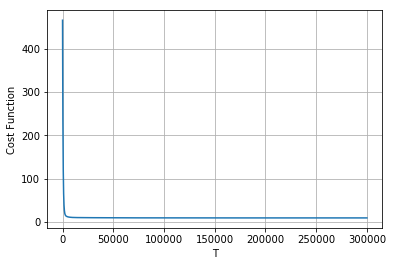

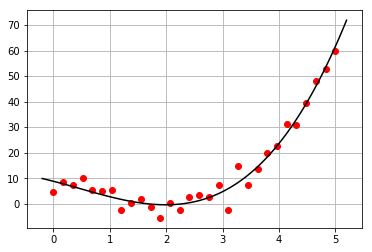

In [4]:
def f(x,w):
    result = w[0]
    #w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3
    n = w.shape[0]
    i = 1
    while(i < n):
        result += w[i]*x**i
        i = i + 1
    return result
def J_Cost(X,y,w):
    result = 0
    dotProduct = w.dot(X.T)
    result = np.mean((dotProduct - y)**2)
    return result
def gradient_descent(X, y, alpha=0.01, T=100):
    J = np.zeros(T) # to hold the cost function value J at each iteration
    N,d = X.shape
    w = np.zeros(d)
    # your code here..
    X_TRANS = X.T
    P = X_TRANS.dot(X)
    R = X_TRANS.dot(y)
    for i in range(T):
        J[i] = J_Cost(X,y,w)
        w = w -2/N*alpha*(P.dot(w)-R)
    return w, J

# fit the model to the data:
# your code here..
#8.03551749  1.02900582 -5.20392252  1.43056097
T = 300000
w, J_cost = (gradient_descent(des_m,y,0.00039,T))
space = np.linspace(1,T,T)
plt.plot(space,J_cost)
plt.xlabel('T')
plt.ylabel('Cost Function')
print(w[0],w[1],w[2],w[3])
plt.grid()
plt.show()
plt.plot(x,y,'or',xx,f(xx,w),'-k')
plt.grid()
plt.show()
#10 , -5,-2,1
#xx**3 -2*xx**2 -5*xx + 10

### Regression closed form solution

Now, instead of using the Gradient-Descent algorithm, we will use the closed form solution:

$$ w^{*} = C^{-1}u$$

where, 

$$ C = X^\top X\ \ ,\ \ u=X^\top y$$


Fit a *cubic* model to the data, and compare to the Gradient-Descent's results. 

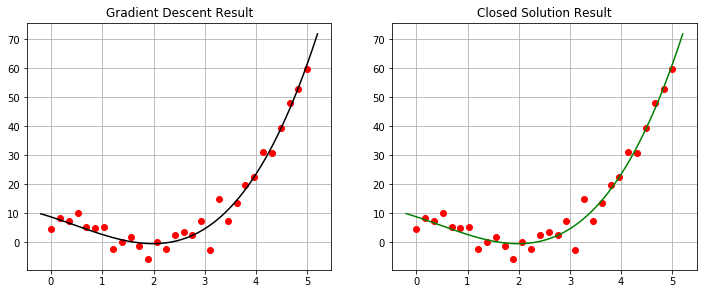

In [5]:
def linear_regression (X, y):
    # your code here..
    X_TRANSPOSE = X.T
    w = np.linalg.inv(X_TRANSPOSE.dot(X)).dot(X_TRANSPOSE).dot(y) 
    return w
# fit the model to the data:
# your code here..
closedW = linear_regression(des_m,y)
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title("Gradient Descent Result")
plt.plot(x,y,'or',xx,f(xx,w),'-k')
plt.grid()
plt.subplot(2,2,2)
plt.title("Closed Solution Result")
plt.plot(x,y,'or',xx,f(xx,closedW),'-g')
plt.grid()
plt.show()

### Over-fitting 

In this section, we will try to fit different models to the data:

1. $ f(x;w)=w_0 + w_1 x  $

2. $ f(x;w)=w_0 + w_1 x + w_2 x^2 + w_3 x^3 $

3. $ f(x;w)=w_0 + w_1 x + w_2 x^2 + ... + w_5 x^5 $

4. $ f(x;w)=w_0 + w_1 x + w_2 x^2 + ... + w_7 x^7 $

This time, we will use fewer data points ($N=16$) and further divide them into: 8 training points ('red') and 8 testing points ('blue'). 

You will use *only* the training points when fitting the models. 

When plotting the results, plot both testing and training points (in different colors) and the fitted model line $y=f(x;w)$.



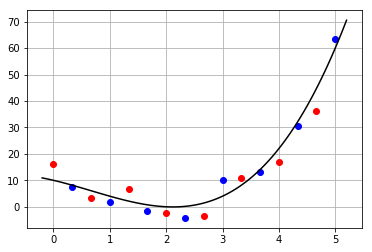

In [6]:
N = 16

# generate N sample points 
x = np.linspace(0,5,N) 
y = x**3 -2*x**2 -5*x + 10
y += np.random.randn(N)*4 # add gaussian noise (with sigma = 4)


# generate 100 points to visualize the true polynomial 
xx = np.linspace(-0.2,5.2,100) 
yy = xx**3 -2*xx**2 -5*xx + 10

x_trn = x[::2] # 0,2,4,6,...
y_trn = y[::2]

x_tst = x[1::2] # 1,3,5,7,...
y_tst = y[1::2]

plt.plot(x_trn,y_trn,'or',x_tst,y_tst,'ob',xx,yy,'-k')
plt.grid()
plt.show()

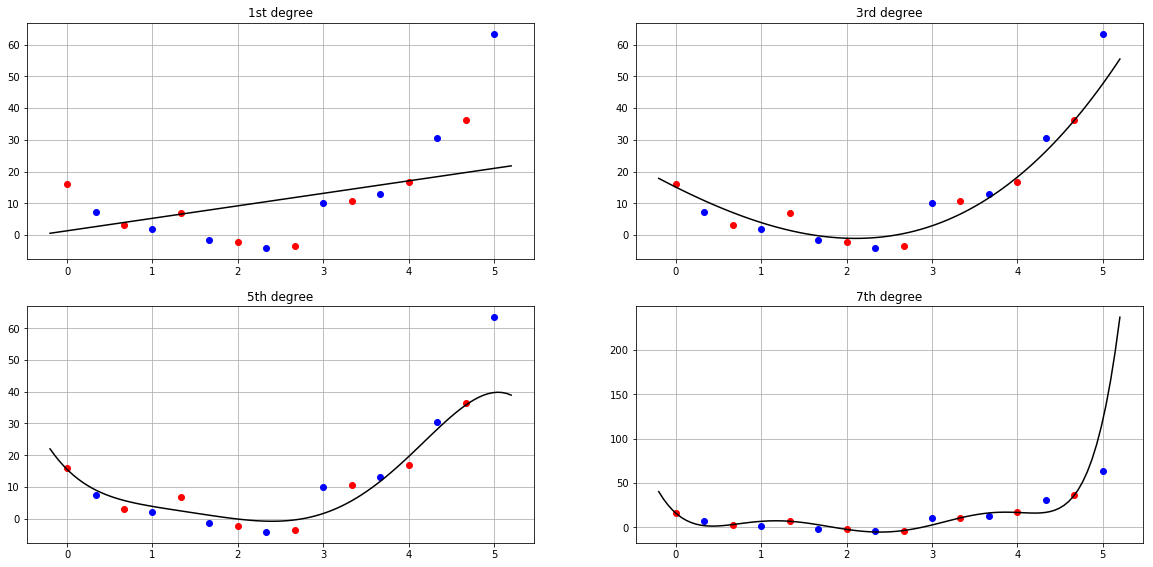

In [7]:
# your code here..
#f(x;w)=w0+w1x
#1st degree
des_m_linear = design_matrix(x_trn,1,8)
w_linear = linear_regression(des_m_linear,y_trn)#or by using gradient_descent(des_m_linear,y_trn,0.00039,500000)[0]
#3rd degree
des_m_3rd_degree = design_matrix(x_trn,3,8)
w_3rd =linear_regression(des_m_3rd_degree,y_trn)#or by using gradient_descent(des_m_3rd_degree,y_trn,0.00039,500000)[0]
#5th degree
des_m_5th_degree = design_matrix(x_trn,5,8)
w_5th =linear_regression(des_m_5th_degree,y_trn) #or by using(needs to find correct T and alpha, current values gives only ok estimate) gradient_descent(des_m_5th_degree,y_trn,0.0000008,900000)[0]
#7th degree
des_m_7th_degree = design_matrix(x_trn,7,8)
w_7th = linear_regression(des_m_7th_degree,y_trn) #or by using(needs to find correct T and alpha, current values gives only ok estimate) gradient_descent(des_m_7th_degree,y_trn,0.0000000009,10000000)[0]

plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
plt.title("1st degree")
plt.grid()
plt.plot(x_trn,y_trn,'or',x_tst,y_tst,'ob',xx,f(xx,w_linear),'-k')
plt.subplot(4,2,2)
plt.title("3rd degree")
plt.plot(x_trn,y_trn,'or',x_tst,y_tst,'ob',xx,f(xx,w_3rd),'-k')
plt.grid()
plt.subplot(4,2,3)
plt.title("5th degree")
plt.plot(x_trn,y_trn,'or',x_tst,y_tst,'ob',xx,f(xx,w_5th),'-k')
plt.grid()
plt.subplot(4,2,4)
plt.title("7th degree")
plt.plot(x_trn,y_trn,'or',x_tst,y_tst,'ob',xx,f(xx,w_7th),'-k')
plt.grid()
plt.show()


## Good luck !